<a href="https://colab.research.google.com/github/HyelinNAM/TIL/blob/master/0224_Pytorch)AE(AutoEncoder).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AE(AutoEncoder)


*   MNIST
*   Neural Net




## 1. Settings

In [0]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms

from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
# Set hyperparameters
batch_size = 16
learning_rate = 0.0001
epoch = 5

## 2. Data

In [0]:
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


In [0]:
len(mnist_train)

60000

In [0]:
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

In [0]:
len(train_loader) # 60000 / 16

3750

## 3. Model & Optimizer

In [0]:
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder,self).__init__()
    
    self.encoder = nn.Linear(28*28,20)
    self.decoder = nn.Linear(20,28*28)

  def forward(self,x):
    x = x.view(batch_size,-1)
    encoded = self.encoder(x)
    out = self.decoder(encoded).view(batch_size,1,28,28)

    return out

model = Autoencoder().cuda()

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

## 4. Train

In [0]:
loss_list = []

for i in range(epoch):

  running_loss = 0.0

  for j,[image,label] in enumerate(train_loader):
    x = Variable(image).cuda()

    optimizer.zero_grad()
    output = model.forward(x)
    loss = criterion(output,x)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if j % 1000 == 0 :
      print(running_loss/len(train_loader))
      #print("loss: %0.5f" %(running_loss/len(train_loader)))
      loss_list.append(running_loss/len(train_loader))

7.216894626617432e-06
0.00642397094964981
0.012843848432103793
0.019267303781211376
6.357422471046448e-06
0.006431310933828354
0.012850512120624383
0.019281155553956826
7.000480095545451e-06
0.00641160515298446
0.01282800057977438
0.019223043925563496
6.2099844217300416e-06
0.006407234074672063
0.012824021142224471
0.01923921466320753
6.322734554608663e-06
0.006429706465701263
0.012844910392165183
0.019252769843737284


## 5. Check with Train image

torch.Size([16, 28, 28])


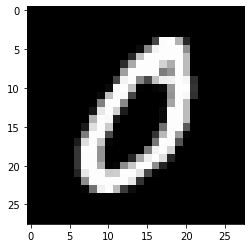

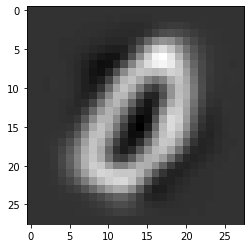

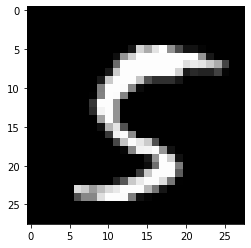

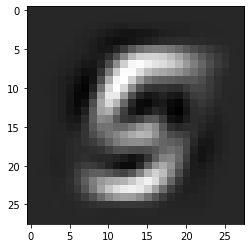

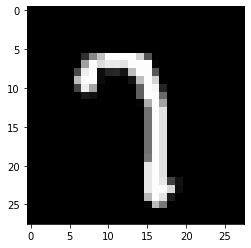

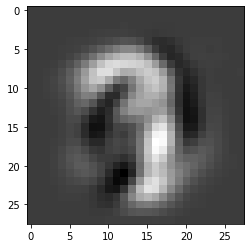

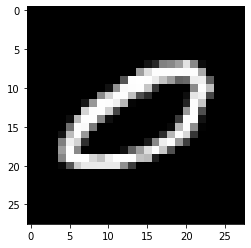

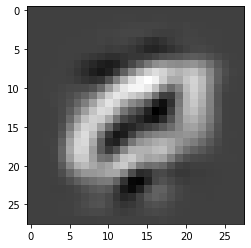

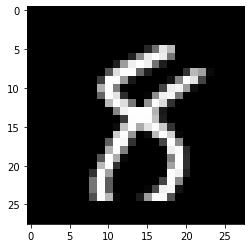

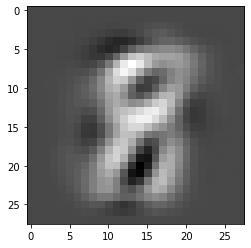

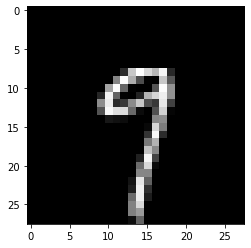

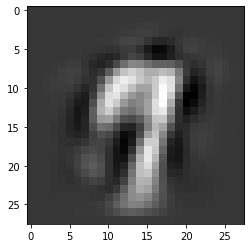

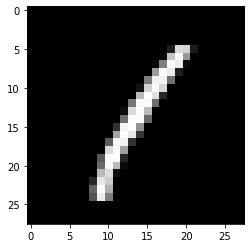

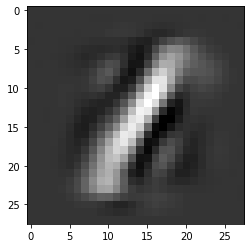

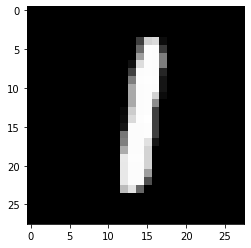

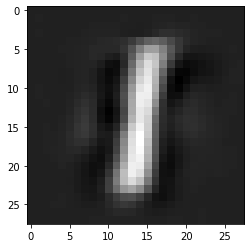

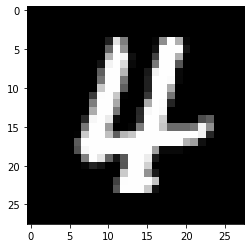

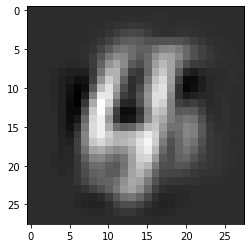

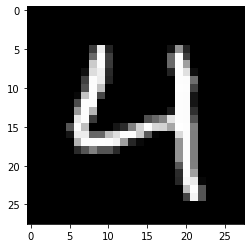

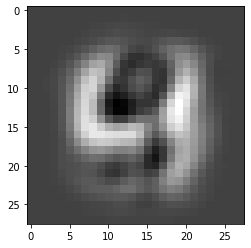

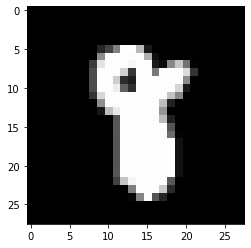

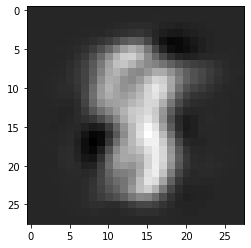

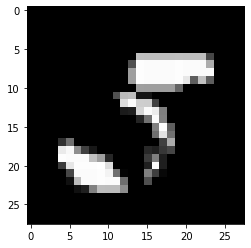

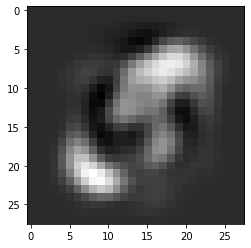

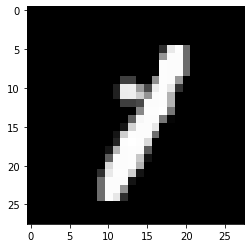

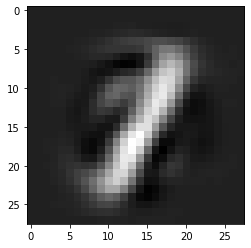

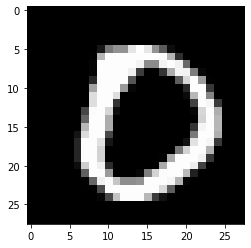

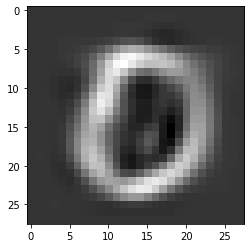

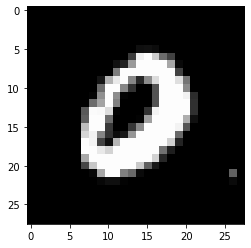

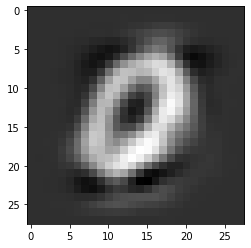

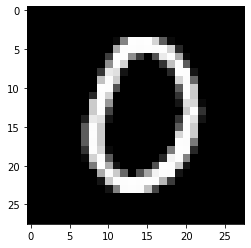

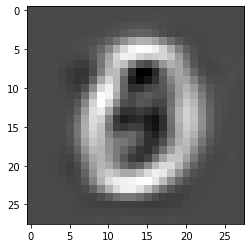

In [0]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(out_img.size()[0]):
    plt.imshow(torch.squeeze(image[i]).numpy(),cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()